<center>
    <img src="https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


In [1]:
# Configurations for Colab
import sys
path='./'
if 'google.colab' in sys.modules:
  %matplotlib inline
  !git clone https://github.com/GuitarsAI/ADSP_Tutorials.git
  path="ADSP_Tutorials/"

Cloning into 'ADSP_Tutorials'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 275 (delta 92), reused 110 (delta 29), pack-reused 73
Receiving objects: 100% (275/275), 84.78 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (116/116), done.


# Noble  Identities, Filters

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Qd5fFXLKNq4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Filter Design

How do we design filters, such that they have desired properties?
    
First we should know how the **ideal or desired filter** should look like. In general, we specify the frequency responses with magnitude and phase,

$$\large
H(\Omega)=e^{j \phi(\Omega)} \cdot A(\Omega)$$

where $\phi(\Omega)$ is our phase (in dependence of our normalized frequency $\Omega$), and $A(\Omega)$ is our magnitude. If we want to design our filter, we need to specify both, phase and magnitude.


In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/yte_oq57dO4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Linear Phase and Signal Delay

The phase angle of our system is connected to the delay of our system. Imagine, we have a pure delay of d samples, resulting in a transfer function in the z-transform domain as $H(z)=z^{-d}$, then we get the frequency response in the Discrete Time Fourier Transform (DTFT) domain by replacing $z$ by $e^{j\Omega}$ as $H(e^{j\Omega})=e^{-j\Omega \cdot d}$. Hence our phase response is 

$$\large
\phi(\Omega)=angle(e^{-j\Omega \cdot d})=-\Omega \cdot d$$
 
The other way around, we can **obtain the delay** in samples by **dividing** the **phase angle** by the **normalized frequency**,
    
$$\large
d=\frac{-angle(H(e^{j\Omega}))} {\Omega}$$

Observe: In **Python**, the function np.angle() returns the angle of a complex number, in radians (between 0 and 2pi), suitable for our normalized frequencies.

If the phase angle is a linear function in $\Omega$, with a slope of -d, we  call it a  **“linear phase”**. Observe that (only) in this case we have the **same delay** d for all frequencies! We can now also see that the (negative) slope of the phase curve corresponds to the delay d. 

This linear phase is important for instance for image processing. Edges contain many different frequencies, and if we had different group delays for different frequencies, edges would “disolve” and appear unsharp.

If the phase and delay is not important, often a linear phase is still chosen as default for filter design.

### General Phase and Signal Delay

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/UrP3E4emYfc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In general, we call the negative derivative with respect to $\Omega$ the “**group delay**”, which may be dependent on the frequency $\Omega$. If we call the group delay $d_g(\Omega)$, then it is defined as

$$\large
d_g(\Omega)= - \frac{\partial \phi(\Omega)}{\partial \Omega}
$$

which is an important definition.

This means that the phase tells you how much delay each frequency group has through the system. When we design a system, this is what we need to keep in mind.

### Magnitude Design

In [5]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/VinyOTdK644" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Now we also need to think about the desired **magnitude** $A(\Omega)$ of our filter. Often, one or multiple **pass bands** are desirable, where the signal is passed and hence has close to 0 dB attenuation, together with one or multiple **stop bands**, at which frequencies the signal is “**stopped**”, meaning it has strong attenuation. To do that we need to decide where the band edges are, in normalized frequencies.

The filter coefficients of an FIR filter are its impulse response. We can obtain the ideal impulse response of a desired filter design in the frequency domain $H(e^{j\Omega})$ by applying the inverse DTFT to it:

$$\large
h(n)= \frac{1} {2 \pi} \cdot \int_{\Omega=-\pi} ^ \pi H(e^{j\Omega}) e^{j \Omega n} d \Omega
$$

But this “ideal filter” in general is infinitely long, into the past and future, and hence not realizable. We need to approximate our desired frequency response by minimizing some error function, which we need to define or choose, according to our applications requirements.

Since we have no ideal filters, first we need to give the system **transition bands** between the pass bands and the stop bands, to give the filter space to come from one state (passing a signal) to another state (stopping a signal). This  means, there need to be gaps between the pass bands and the stop bands.

### Example

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/STaPoFacvSg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We would like to have a **half band low pass** filter. We would like to have a pass band from frequency 0 up to frequency $\dfrac{\pi}{2}$, a half band filter. If we want to use it for sampling rate conversion with a downsampling factor of 2, we actually need to make sure that the stop band starts at $\dfrac{\pi}{2}$.

We also need to create a transition band, for instance going from $\dfrac{\pi}{2} -0.1$ to $\dfrac{\pi}{2}$. This transition band is where we don't care about that value of our frequency response, and it is something that we can use to fine-tune the resulting filter. For instance if we see we don't get enough attenuation, we can increase the bandwidth of our transition band.

Here our **passband** is given as between 0 and $\dfrac{\pi}{2} -0.1$.

This is now still not an ideal because of the infinite stopband attenuation. That is why we need to define an error measure or an **error function**,  which measures how close we come to the ideal, how “good” the filter is, and which we can use to obtain a design which minimizes this error function.

Often used error functions are the **mean squared error**, the **mean absolute error**, the **weighted mean squared error**, or the **minimax error** function (which seeks to minimize the maximum deviation to the ideal).

The **weighted mean squared error** uses weights to give errors in different frequency regions different importance. For instance, the error in the stop-band is often more important than in the pass-band, to obtain a high attenuation in the stop-band. An error of 0.1 in the pass-band might not be so bad, but an error of 0.1 in the stop-band leads to only -20 dB attenuation, which is not very much. (we optimize in the linear domain and not in the dB domain). So in this case, we might assign a weight of 1 to the pass bands, and a weight of 1000 to the stop bands, to obtain higher stop band attenuations.

The optimization usually results in the same or similar **weighted error** for all frequencies. For instance we get: errorstopband*1000=errorpassband*1, and hence errorstopband=errorpassband/1000.

For **FIR linear phase filters**, Python has the specialized optimization in the function “remez” which implements the so-called Parks-McLellan algorithm, using the Chebyshev algorithm (see also the Book: Oppenheim, Schafer: “Discrete-Time Signal Processing”, Prentice Hall) . 

This is now also an example of the **minimax error function**. The algorithm minimizes the maximum error in the pass band and the stop band (weighted in comparison between the two), which leads to a so-called equi-ripple behaviour (all ripples have the same height in the same band, e.g. stop band or pass band) of the filter in the frequency domain.<br>
It is called in the form:

`hmin=scipy.signal.remez(N,F,A,W);`

where N is the length of the filter, F is the vector containing the band edges (now normalized to the Nyquist frequency as 0.5, hence between 0 and 0.5) of the pass band and stop band (the gap between them is the transition band).

A is the desired amplitude vector for the specified bands, and W is the weight vector for the bands.

### Python Example

In [7]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/y6eEd41O_TM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

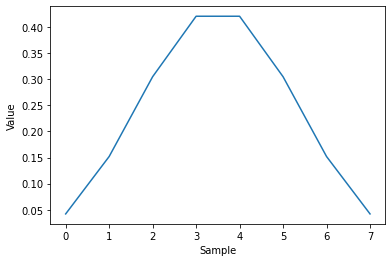

In [8]:
if 'google.colab' in sys.modules:
  %matplotlib inline
else:
  %matplotlib notebook
  
import matplotlib.pyplot as plt
import scipy.signal as sp
N=8;
F = [0.0, 0.5/2 - 0.05, 0.5/2, 0.5]
A = [1.0, 0.0]
W = [1, 100]

hmin = sp.remez(N, F, A, weight=W)

plt.figure()
plt.plot(hmin)
plt.xlabel('Sample')
plt.ylabel('Value');

 Now we obtain a nice impulse response or set of coefficients hmin and its frequencies response is:

In [9]:
from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [10]:
w, h = freqz(hmin)

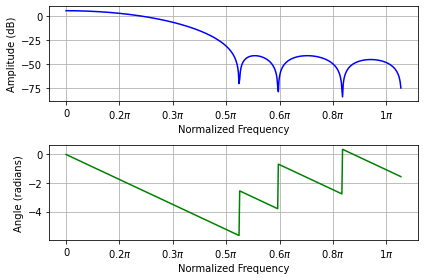

In [11]:
fig = plt.figure()
plt.title('Digital filter frequency response')
plt.subplot(2,1,1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.5))
plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.5))
plt.grid()
plt.tight_layout();

Here we see that we obtain about -40 dB of stop band attenuation, which roughly corresponds to our weight of 100 for the stop band.

### Example with Sound

In [12]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/v_tfCaexdkM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We have **8000 Hz sampling rate**, and want to build a **band pass** filter. Our low stop band is between 0 and 0.05, our pass band between 0.1 and 0.2, and high stop band between 0.3 and 0.5 (again with 0.5 as Nyquist frequency and 1 as sampling frequency). Hence, our pass band will be between 0.1 * 8000=**800Hz** and 0.2 * 8000=**1600 Hz**.<br>
Hence our vector bands is

``` F=[0.0, 0.05, 0.1, 0.2, 0.3, 0.5]```

The vector desired contains the desired magnitude A per band. Hence here for our bandpass filter it is:

```A=[0.0, 1.0, 0.0]```

We choose our weights:

```weight=[100.0, 1.0, 100.0]```

and our  numtaps =N= 32.

Hence our design function in Python is:

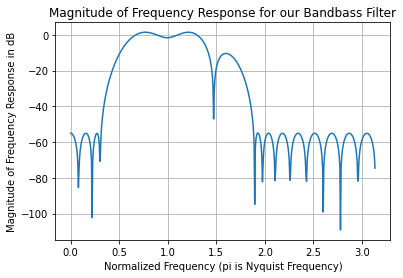

In [13]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
N=32
bpass=scipy.signal.remez(N, [0.0, 0.05, 0.1, 0.2, 0.3, 0.5]  , [0.0, 1.0, 0.0], weight=[100.0, 1.0, 100.0])

plt.figure()
[freq, response] = scipy.signal.freqz(bpass)
plt.plot(freq, 20*np.log10(np.abs(response)+1e-6))
plt.xlabel('Normalized Frequency (pi is Nyquist Frequency)')
plt.ylabel("Magnitude of Frequency Response in dB")
plt.title("Magnitude of Frequency Response for our Bandbass Filter")
plt.grid()
plt.show();

**Observe:** The equi-ripple behaviour inside each band is clearly visible, and we see our pass band a little left of the center. The side lobe to its right is from the transition band there.
Next we plot its **impulse response**,

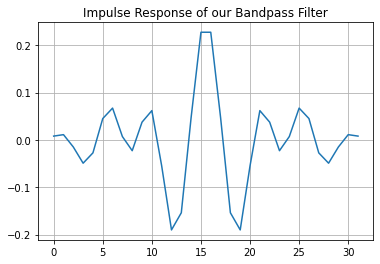

In [14]:
plt.figure()
plt.plot(bpass) 
plt.title('Impulse Response of our Bandpass Filter')
plt.grid()
plt.show()

**Observe:** The impulse response is symmetric around the center, because it is a linear phase filter, and it still has similarity with a sinc function.

In [15]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/BqWPXg_4ZXw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
"""
PyAudio Example: Filter the audio signal between input and output (i.e., record a
few samples, filter them, and play them back immediately).
Gerald Schuller, November 2014


Updated and Ported to Jupyter Notebooks by: Renato Profeta, November 2019
Using PyAudio Callback Mode, Matplolib
"""

import time
import numpy as np
from pyaudio import PyAudio, paFloat32, paContinue, paInt16, paComplete
from ipywidgets import ToggleButton, Checkbox
import threading
import scipy.signal

filter_on=False

button_stop= ToggleButton(description='Stop')
box_filter = Checkbox(False, description='Filter ON / OFF')

def on_button_stop(change):
    if change['new']==True:
        stream.stop_stream()
        stream.close()
        pa.terminate()
        button_stop.disabled=True
        print('PyAudio terminated...')
button_stop.observe(on_button_stop, 'value')
display(button_stop)

def box_filter_changed(box_filter):
    global filter_on
    if box_filter['new']: 
        filter_on=True
    else:
        filter_on=False       
box_filter.observe(box_filter_changed, names='value')
display(box_filter)

N=32
bpass=scipy.signal.remez(N, [0.0, 0.05, 0.1, 0.2, 0.3, 0.5]  , [0.0, 1.0, 0.0], weight=[100.0, 1.0, 100.0])
z=np.zeros(N-1)



def callback(in_data, frame_count, time_info, flag):
    global filter_on, z, bpass
    audio_data = np.frombuffer(in_data, dtype=np.float32)
    audio_data_s = audio_data
    if filter_on:
        [filtered,z]=scipy.signal.lfilter(bpass, [1], audio_data_s, zi=z)
        audio_data_s=filtered.astype(np.float32)
    if button_stop.value==True:
        return (audio_data_s, paComplete)
    return (audio_data_s, paContinue)

pa = PyAudio()

stream = pa.open(format = paFloat32,
                 channels = 1,
                 rate = 8000,
                 output = True,
                 input = True,
                 frames_per_buffer = 1024,
                 stream_callback = callback)


def keep_alive(button_stop):
    while stream.is_active():
        if button_stop.value==True:
            break
        time.sleep(0.1)

# Create a Thread for run_spectrogram function
thread = threading.Thread(target=keep_alive, args=(button_stop,))
stream.start_stream()
thread.start()

**Observe:** Speech sounds like through a very cheap telephone, since only a small band is left of it (telephone bandwidth is about 0.3 to 3.4 kHz).

## Filtering and Sampling

In [16]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TUR2O3VVEHY" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-1.PNG?raw=1'>
</center>

## Multirate Noble Identities

In [17]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/iUfpX1rvryE" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

For multirate systems, the so-called Noble Identities play an important role:

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-2.PNG?raw=1'>
    <font size='2'>
(From: https://ccrma.stanford.edu/~jos/sasp/Multirate_Noble_Identities.html)
</font>
</center>
<br>
The symbol $\downarrow N$ means: Downsampling by a factor of N by keeping only every N'th sample.

The symbol $\uparrow N$ means: upsamling the sequence by inserting N-1 zeros after each sample.

**Example:** The filter impulse response shall be $h=[1,2,3]$, hence its z-transform is

$$\large
H(z)=1+z^{-1} \cdot 2 + z^{-2} \cdot 3
$$

For N=2 the upsampled version is

$H(z^2)= 1 + z^{-2} \cdot 2 + z^{-4} \cdot 3$, which corresponds to the upsampled, (“sparse” because of the zeros in it), impulse response
$hu=[1,0,2,0,3]$.

The Noble Identities tell us, in which cases we can **exchange down or up-sampling with filtering**. This can be done in the case of sparse impulse responses, as can be seen above.

Observe $H(z^N)$ that is the upsampled version of $H(z)$. Remember that the upsampled impulse response has N-1 zeros inserted after each sample of the original impulse response.

**Observe:** This upsampled filter $H(z^N)$ is in most applications a useless filter, because we not only have 1 passband, but also get N-1 aliased versions for a total of N passbands! But in most applications we want to have only 1 passband. We will make it useful later.

**Example:** Take a simple filter, in Matlab or Octave or Python notation: B=[1,1]; (a running average filter), an input signal x=[1,2,3,4,...] , in Python:

In [18]:
x =np.arange(1,10, dtype='float') #lfilter needs float
N=2
x

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

Now we would like to implement the **first block diagram** of the Noble Identities, the down-sampling (the pair on the first line, with outputs y1 and y2). 

$\rightarrow$ First, for **y1, first down sampling, then filtering**, the down-sampling by a factor of N=2:

```xd = x[::N]```

This yields:
`xd=1,3,5,7,9`

Then apply the filter ```B=[1,1]```,

```y1 = scipy.signal.lfilter(B, 1, xd)```

This yields the sum of each pair in xd:

```y1= 1,4,8,12,16```

    
$\rightarrow$ Now **first filtering, then down sampling**,  to implement the corresponding right-hand side block diagram of the noble identity. Our filter is now up-sampled by N=2:

```         Bu = np.zeros(3)```

```         Bu[::N] = B```

This yields

```Bu= 1,0,1```

Now filter the signal before down-sampling:


```yu = scipy.signal.lfilter(Bu, 1, x)```

This yields

```yu= 1, 2, 4, 6, 8, 10, 12, 14, 16, 18```

Now down-sample it:

```y2 = yu[::N]```

This yields

```y2= 1,4,8,12,16```

Here we can now see that they are indeed identical, y1=y2!


In [19]:
xd = x[::N]
print("downsampled x = ",xd)
B=[1,1]
y1 = scipy.signal.lfilter(B, 1, xd)
print("y1 = ",y1)
Bu = np.zeros(3)
Bu[::N] = B
print("Bu = ",Bu)

yu = scipy.signal.lfilter(Bu, 1, x)
y2 = yu[::N]
print("y2 = ",y2)

downsampled x =  [1. 3. 5. 7. 9.]
y1 =  [ 1.  4.  8. 12. 16.]
Bu =  [1. 0. 1.]
y2 =  [ 1.  4.  8. 12. 16.]


In [20]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/r48cNmNeVHs" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

These Noble identities can be used to create efficient systems for sampling rate conversions. In this way we can have filters, which always **run** on the **lower sampling rate**, which makes the implementation easier (Remember: so far we always did the filtering at the higher sampling rate).

It is always possible to **rewrite a filter as a sum of up-sampled versions** of its phase shifted and down-sampled impulse response, as can be seen in the following decomposition of a filter $H(z)$. In this way we can make out of our previously **useless** filter **useful** filters, by combining several of our upsampled versions into a new useful filter $H(z)$(e.g. coming out of remez):
    
 $$\large
 H(z)= H_0(z^N)+ H_1(z^N)\cdot z^{-1} + ...+H_{N-1}(z^N) \cdot z^{-(N-1)}$$

Here $H_0(z^N)$,contains the coefficients of our original filter $H(z)$ at positions at $mN$, at phase 0, 
$H_1(z^N)$contains the coefficients at positions $mN+1$, at phase 1, and in general $H_i(z^N))$ contains the coefficients at positions mN+i, at phase i. This means :

$H_i(z)$ **is the z-transform** of $h(mN+i)$

(where $h(n)$ is the impulse response of our original filter).

Since it can be seen as many different “phases” of our impulse response, the   components $H_i(z)$ are also called “**polyphase components**” or “**polyphase elements**”.

This is illustrated in the following pictures. First is a simple time sequence,

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-3.PNG?raw=1'>
</center>
<br>

This sequence, for a sampling factor of N=3, can then be decomposed in the following 3 **up-sampled polyphase components** (meaning containing the zeros in it):

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-4.PNG?raw=1'>
</center>
<br>

The upper plot is $H_0(z^N)$, the middle plot is $z^{-1}\cdot H_1(z^N)$, and the lower plot is $z^{-2}\cdot H_2(z^N)$.

The same can be done for our signal $x(n)$. Our **polyphase component** $H_i(z)$ is the z-transform of $x(mN+i)$.


In [21]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/UPT-zFuqfAQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Example:**

The impulse response or our filter is
$$h=[1,2,3,4,...]$$
then its z-Transform is

$$H(z)=1+2z^{-1}+3z^{-2}+4z^{-3}+...$$
Assume N=2. Then we obtain its (up-sampled) polyphase components as

$$H_0(z^2)=1+3z^{-2}+5z^{-4}+...$$
$$H_1(z^2)=2+4z^{-2}+6z^{-4}+...$$

Hence we can combine the total filter from its polyphase components,

$$H(z)=H_0(z^2)+z^{-1} H_1(z^2)$$

The general case is illustrated in the following block diagram, which consists of a delay chain on the left to implement the different delays $z^{-i}$, and the polyphase components $H_i(z^N)$ of the filter:

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-5.PNG?raw=1'>
</center>

(Figure 1)

This could be a system for down-sampling rate conversion, where we first low-pass filter the signal x to avoid aliasing, and then down-sample it.

In this way we can decompose our filter in N polyphase components, where i is the “phase” index.

Now we can simplify this system by using the **Noble Identities**.

Because in this sum we have transfer functions of the form $H_i(z^N)$, we can use the Noble identities to simplify our sampling rate conversion, to shift the down-samplers before the sum and before the filters (but not before the delay chain on the left side), with replacing the polyphase filters arguments $z^N $ with $z$:

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-6.PNG?raw=1'>
</center>
<br>

Looking at the delay chain and the following down-samplers, we see that this corresponds to “**blocking**” the signal x into consecutive blocks of size N. This can also seen as a **serial to parallel** conversion for each N samples. Hence we now have a block-wise processing with our filter, and the filtering is now completely done at the lower sampling rate, which reduces speed requirements for the hardware. We obtained a parallel processing at the lower sampling rate.

Since we have N polyphase components in parallel, we can also represent them as **polyphase vectors**, and obtain a vector multiplication for the filtering at the lower sampling rate,

$$\large
\sum_{i=0} ^{N-1} X_i(z) \cdot H_i(z)=Y(z)
$$

$$\large
[X_0(z),..., X_{N-1}] \cdot [H_0(z), ... , H_{N-1}(z)]^T=Y(z) 
$$

**Observe:** If we have more than 1 filter, we can collect their polyphase vectors into “**polyphase matrices**”.

**Observe:** This is mathematically a very convenient description, because it includes **sampling** as part of this simple **vector multiplication**!

In [22]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/9ZIWQclxDi0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Python Example Down-sample:** 
Down-sample an audio signal. First read in the audio signal into the variable x:

In [23]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/NOQuRWAoHgw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [24]:
# Impoirts
import librosa

In [25]:
x, sr = librosa.load(path+'audio/the-dead-daisies_long-way-to-go.mp3')

import IPython.display as ipd
display(ipd.Audio(x[10*sr:20*sr], rate=sr))

Take a low pass FIR filter  with impulse response 
h=[0.5, 1, 1.1, 0.6] and a down-sampling factor N=2. Hence we get the z-transform of the impulse response as $H(z)=0.5+1 \cdot z^{-1} +1.1 \cdot z^{-2}+0.6 \cdot z^{-3}$ and its polyphase components as

$$H_0(z)=0.5 + 1.1 \cdot z^{-1}$$    
, $$H_1(z)=1+0.6 z^{-1}$$

#The polyphase components in in the time domain (in Python) are hence:

```h0 = h[0::2]```

```h1 = h[1::2]```


Produce the 2 phases of a down-sampled input signal x:

```x0 = x[0::2]```

```x1 = x[1::2]```

We look at our diagram above for N=2, where we see: $Y(z)=X_0(z) \cdot H_0(z) + X_1(z) \cdot H_1(z)$, and remember that a multiplication in the z-domain is a convolution or filtering in the time domain. Then the filtered and down-sampled output y is

```y=scipy.signal.lfilter(h0,1,x0)+scipy.signal.lfilter(h1,1,x1)```

In [26]:
h=[0.5, 1, 1.1, 0.6]
h0 = h[0::2]
h1 = h[1::2]
x0 = x[0::2]
x1 = x[1::2]

import scipy.signal
y=scipy.signal.lfilter(h0,1,x0)+scipy.signal.lfilter(h1,1,x1)


Observe that each of these 2 filters now works on a down-sampled signal, but the result is identical to first filtering and then down-sampling.  

Now listen to the resulting down-sampled signal:

In [27]:
display(ipd.Audio(y[10*(sr//2):20*(sr//2)], rate=sr//2))

Correspondingly, **up-samplers** can also be obtained with filters operating on the **lower sampling rate**.

Since $H_i(z^N)$ and $z^{-i}$are linear time-invariant systems, we can exchange their ordering,

$$\large
H_i(z^N) \cdot z^{-i}=z^{-i}\cdot H_i(z^N)
$$

Hence we can redraw the polyphase decomposition for an up-sampler followed by a (e.g. low pass) filter (at the high sampling rate) as follows (compare to Figure 1, with the delay elements shifted to the output). Hence we have for upsampling followed by low pass filtering the following picture,

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-7.PNG?raw=1'>
</center>
<br>

Using the Noble Identities, we can now shift the up-sampler to the right, behind the polyphase filters (with changing their arguments from $z^N$ to $z$) and before the delay chain, polyphase components $Y_i(z)$

<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture8-8.PNG?raw=1'>
</center>
(Picture 2)
<br>


Again, this leads to a parallel processing, with N filters working in **parallel** at the **lower sampling rate**. The structure on the right with the up-sampler and the delay chain can be seen as a **de-blocking** operation. Each time the up-sampler let a complete block through, it is given to the delay chain. In the next time-steps the up-samplers stop letting through, and the block is shifted through the delay chain as a sequence of samples. This can also be seen as a **parallel to serial conversion**.

With the polyphase elements $Y_i(z)$ the processing at the lower sampling rate can also be written in terms of **polyphase vectors**

$$\large
Y(z) \cdot [H_0(z),..., H_{N-1}(z)]=[Y_0(z),...,Y_{N-1}(z)]
$$

**Observe:** If we have more than 1 filter, we can collect their polyphase vectors into **polyphase matrices**.

**Python Example Up-Sample**

Up-sample the signal y by a factor of N=2 and low-pass filter it with the filter  h = np.array([0.5, 1, 1.1, 0.6]) as in the previous example. 

Again we obtain the filters polyphase components as h0 = h[0::2],
h1 = h[1::2]

In [28]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/lOn7dPa83DM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [29]:
h = np.array([0.5, 1, 1.1, 0.6])
h0 = h[0::2]
h1 = h[1::2]

Next we need to upsample and do the phase delay (see the block diagram Picture 2), for our de-blocking:

In [30]:
y0 = scipy.signal.lfilter(h0,1,y)
y1 = scipy.signal.lfilter(h1,1,y)
L = max([len(y0), len(y1)]) 
yu = np.zeros(2*L)
#upsampling with phase 0:
yu[0::2] = y0
#upsampling with phase 1:
yu[1::2] = y1

Where now the signal yu is the same as if we had first up-sampled and then filtered the signal!
Now listen to the up-sampled signal:

In [31]:
display(ipd.Audio(yu[10*sr:20*sr], rate=sr))